>
# Project: Investigate a Dataset (The Movie Database )

#To analyze and invertigate dataset of TMDb

This dataset TMDb (The Movie Database ) contains information on 10866 movies giving various data on runtime, budget, revenue , directors and genres of the films etc. I choose this dataset as I was interested to know more about the movies which is part of our life. So the curiosity to know more about the movies made me select this dataset.
I tried to explore various variables and its co relation with other variables within the dataset. 
like-
~ relationship between release_year and popularity.
~ relationship between runtime and release_year.
~ relationship between runtime and popularity

I will explore and find answers to the following questions in the dataset.
~ 1 What is the co realtionship between runtime and popularity? More runtime means more popularity?
~ 2 Which are the features associated to high popularity (ranking)?
~ 3 What has been the budget trends over the years? Did it increase or decrease over the years?
~ 4 How does popularity change over the years, how is its trend over the years?
~ 5 Which are the movies that got highest and lowest vote average?
~ 6 Which are the directors who made highest number of movies and what is the difference in their popularity ranking?
~ 7 More vote average means movies with more popular ranking?
~ 8 What is the co-relationship between Budget and popularity?
~ 9 Which are the top 5  movies with i.highest budget ii. with highest popularity iii.vote average 
~ 10 Which is the genre with highest number of movies in the dataset?
~ 11 How has been the trend of the movie release over the years?
~ 12 Which is the most popular movie in this dataset?
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

To get familiarize with the dataset. Understand the data to frame questions. The number of columns and rows, unique values in the dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df= pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


Here we see casts, genres, production companies are strings seperated by |. Rest other values in the dataset seems okay.

In [11]:
df.shape

(10866, 21)

Observation : There are 10866 movie samples and 21 columns in the dataset.

In [12]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Observation : Here we see there are missing data in id, cast, hopepage, director, tagline, keywords, overview, production comapnies.
Solution  : I will drop null values columns with small quantity of nulls : cast, director, and genres, in further data cleaning section.

In [13]:
# To check the unique values in the data set
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Observation : We seee unique values of each columns.

In [14]:
# to check the data types in the dataset.
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [15]:
df= pd.read_csv('tmdb-movies.csv')
col_name = df.columns.tolist()
print (col_name)

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


I get to see all the columns in the dataset. This helps to understand the columns in the dataset and know your data well.

In [16]:
# check if there is NaN value in each column
df.isna().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

Observation : There are NaN values in many columns.

In [17]:
# Check the number of NaN values in each feature
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

observation : Homepage and tagline have highest number of NaN values followed by keywords in this dataset.


## Data Wrangling


### General Properties

# After discussing the structure of the data, Now we will see any problems that need to be adressed in data cleaning process.

In [18]:
# check which columns have missing values with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Observation: Here I notice few columns have null values which I will clean later in further data cleaning process.

In [19]:
# To find duplicate rows
df.duplicated().sum()

1

Observation : There is one duplicate row. Hence I will drop it in data cleaning section.

In [10]:
# To understand the data better, summary statistics
#Maximum run count is of 900 mins, Majority of the films have runtime of 111 minutes.
#df.describe()

we get mean and and maximum values of each columns and so can understand data better. Maximum runtime of the movies in this dataset is of 900 mins, Majority of the films have runtime of 111 minutes. Maximum of the films are of the year 2015. I even see that few movies ven have budget of 0$. 


### Data Cleaning

# Will perform data cleaning steps in this part of the section.

In [20]:
# After discussing the structure of the data and any problems that need to be
# To drop or remove the duplicate rows or data in the datatset
df.drop_duplicates(inplace=True)

I dropped the duplicate rows in the dataaset.

In [21]:
#Lets check it one more time whether there are any more duplicate rows or data in the dataset.
df.duplicated().sum()

0

Observation: Now, we can see no duplicate rows in the dataset.

In [22]:
# To deal with missing data.
drop =['cast', 'director', 'genres']
df.dropna(subset= drop, how= 'any', inplace= True)

I have dropped the null values in columns- cast, director, genres.

In [23]:
#Lets again check the dataset to see if the changes are made.
df.isnull().sum()

id                         0
imdb_id                    5
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7838
director                   0
tagline                 2730
keywords                1425
overview                   2
runtime                    0
genres                     0
production_companies     959
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Observation: I can notice here that null values in homepage, tagline, keywords, and production_companies. I will not use homepage, tagline and keywords in my data analysis in future so i will drop these columns later. 

In [24]:
# To check number of values in the budget with 0 value.
df_budget= df.groupby('budget').count()['id']
df_budget.head(5)

budget
0    5578
1       4
2       1
3       3
5       1
Name: id, dtype: int64

In [25]:
# To check number of values in the revenue with 0 value.
df_revenue= df.groupby('revenue').count()['id']
df_revenue.head(5)

revenue
0    5888
2       2
3       3
5       2
6       2
Name: id, dtype: int64

There can be no films with 0 budget and 0 revenue.

Note:- I will replace the values of 0 in budget and revenue with null value in budget and revenue column as they are huge in amount that is more that 50 percent of the movies in the dataset. It will be wise decision to replace the 0 values with null values.

In [26]:
df['budget'] = df['budget'].replace(0,np.NaN)
df['revenue'] = df['revenue'].replace(0,np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 21 columns):
id                      10731 non-null int64
imdb_id                 10726 non-null object
popularity              10731 non-null float64
budget                  5153 non-null float64
revenue                 4843 non-null float64
original_title          10731 non-null object
cast                    10731 non-null object
homepage                2893 non-null object
director                10731 non-null object
tagline                 8001 non-null object
keywords                9306 non-null object
overview                10729 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj             

In [27]:
# lets see the number of movies with 0runtime and its not possible to have such movies with no that is 0 runtime.
df_runtime= df.groupby('runtime').count()['id']
df_runtime.head(5)

runtime
0    28
3     9
4    12
5    12
6    18
Name: id, dtype: int64

Observation: There are 28 such movies with 0 runtime. 
Solution: Its better to just drop them or remove them from the dataset as they are very few.

In [28]:
df.query('runtime!=0', inplace=True)
df.query('runtime==0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


Observation : So now no columns with runtime = 0

In [29]:
df_runtime= df.groupby('runtime').count()['id']
df_runtime.head(5)

runtime
3     9
4    12
5    12
6    18
7    14
Name: id, dtype: int64

In [30]:
# to rop columns that are not needed for data anlysis from the dataset.

df.drop(['imdb_id', 'tagline','homepage','keywords', 'overview'], axis= 1, inplace=True)

In [31]:
# To check the changes made 
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [32]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10703.000000,10703.000000,5.150000e+03,4.843000e+03,10703.000000,10703.000000,10703.000000,10703.000000,1.070300e+04,1.070300e+04
mean,64904.988321,0.653818,3.084401e+07,8.933981e+07,102.736896,220.333178,5.966112,2001.235355,1.781061e+07,5.214228e+07
std,91161.996308,1.005687,3.893782e+07,1.621546e+08,30.079331,579.481969,0.930155,12.825920,3.449988e+07,1.455909e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10538.500000,0.211533,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20235.000000,0.388036,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73637.000000,0.722438,4.000000e+07,1.000000e+08,112.000000,149.000000,6.600000,2011.000000,2.116414e+07,3.497353e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Observation: We can see no 0 values in the budget and revenue. The statistics analysis is better with out values with 'zero'.

# Initial analysis of the data. 
# Exploratory Data Analysis


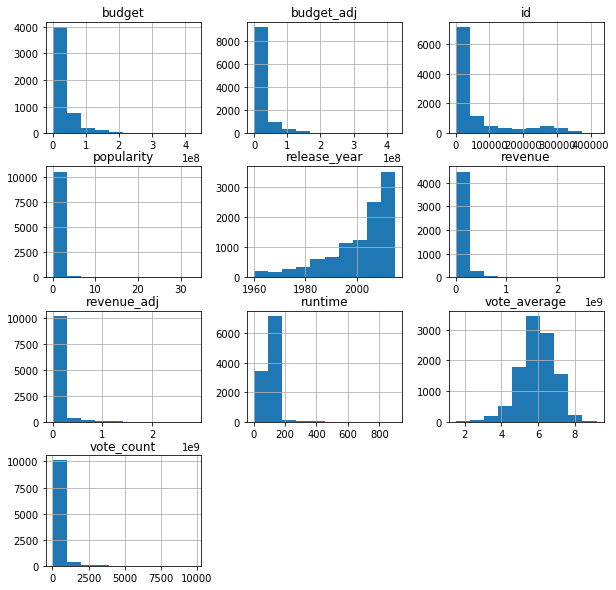

In [33]:
df.hist(figsize=(10,10));

Observation: - We can understand the data better with the help of histogram. Few histograms are left skewed histograms like runtime release year. the mean of the data will be less than the median.

-Maximum of the histograms are right skewed like revenue_adj , vote_count, budget, budget_adj etc.Hence mean will be greater than the median. 

-Only vote_average has normal didtribution of the data in that column, It looks like the bell curve.

# Relationship between the variables.

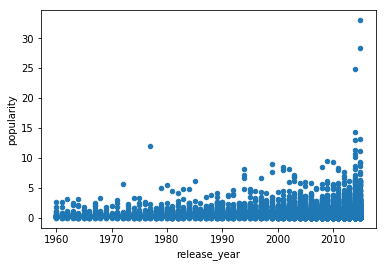

In [34]:
 # To plot relationship between release_year and popularity
df.plot(x='release_year', y='popularity', kind='scatter');

Observation: From the above scatter plot we see that there has been a gradual increase in the popularity ranking from 1960 to 2015. Post 2012 a great rise in the popularity ranking.

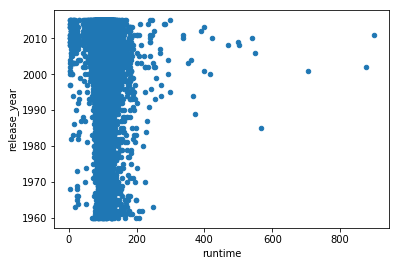

In [35]:
 #plot relationship between runtime and release_year
df.plot(x='runtime', y='release_year', kind='scatter');

Observation: From the above scatter plot we can observe that there has been rise in runtime post 1990 and pre 1990 the runtime of the movies in the dataset remains almost similar till 1960. There is a mojor increase in runtime from 2000 to 2015.

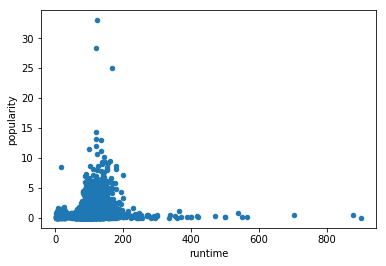

In [36]:
 #plot relationship between runtime and popularity
df.plot(x='runtime', y='popularity', kind='scatter');

Observation : Maximum of the movies are in between 100 and 180 minustes runtime range. There are very few movies whoes runtime crosses 200 minutes mark. To my surprise there are very few movies that even cross 250 minutes, even 400 minutes runtime.

# Question 1  What is the co realtionship between runtime and popularity? More runtime means more popularity?

In [37]:
df.runtime.median()

99.0

In [38]:
df.popularity.median()

0.388036

Observation : Here we get the median of the runtime and the popularity ranking of the dataset

In [39]:
# select movies with less and more than the median runtime
less_runtime = df[df.runtime <99 ]
more_runtime = df[df.runtime >=99 ]

In [40]:
num_runtime = df.shape[0]
num_runtime == less_runtime ['popularity'].count() + more_runtime['popularity'].count() # should be True

True

In [41]:
# To get mean popularity for the less runtime and more runtime groups
less_runtime.popularity.mean(), more_runtime.popularity.mean()

(0.47801760457142684, 0.8230747157527969)

Observation: The mean popularity of the less run time is lesser than the mean popularity of the more time. Hence more the runtime more is the popularity.

In [42]:
median = df['runtime'].median()
less = df.query('runtime < {}'.format(median))
more = df.query('runtime >= {}'.format(median))

mean_popularity_less = less['popularity'].mean()
mean_popularity_more = more['popularity'].mean()

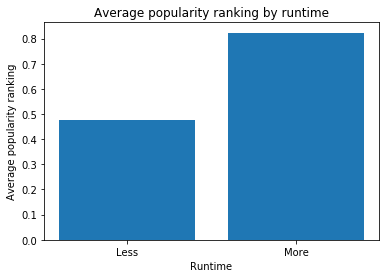

In [43]:
locations = [1, 2]
heights = [mean_popularity_less, mean_popularity_more]
labels = ['Less', 'More']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average popularity ranking by runtime')
plt.xlabel('Runtime')
plt.ylabel('Average popularity ranking');

Observation: Less the runtime, less is the average popularity ranking and more the runtime, more is the average popularity ranking.

In [44]:
df[df['runtime']> 99].shape[0]

5225

There are 5252 films which are more than the median runtime of 99 minutes

In [45]:
df[df['runtime']<= 99].shape[0]

5478

Observation: There are 5614 films which are less than or equal to the median runtime of 99 minutes in this dataset. There are more movies of less than the median runtime of 99 minutes than the movies whose runtime is more than the median.

 # Question 2 Which are the features associated to high popularity (ranking)?

In [46]:
top_popularity = df.query('popularity > popularity.mean()')
top_popularity.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3023.000000,3023.000000,2.475000e+03,2.510000e+03,3023.000000,3023.000000,3023.000000,3023.000000,3.023000e+03,3.023000e+03
mean,55864.132319,1.557925,4.664944e+07,1.481411e+08,107.845518,655.483626,6.255409,2003.026133,4.386546e+07,1.528614e+08
std,85914.229144,1.540484,4.681541e+07,2.041149e+08,23.557236,943.603546,0.798126,11.221536,4.884795e+07,2.367186e+08
min,5.000000,0.654013,8.000000e+00,1.600000e+01,3.000000,10.000000,3.300000,1960.000000,0.000000e+00,0.000000e+00
25%,4599.000000,0.826427,1.500000e+07,2.942036e+07,95.000000,146.000000,5.700000,1997.000000,6.447637e+06,7.954789e+06
50%,11374.000000,1.101383,3.000000e+07,8.123583e+07,105.000000,318.000000,6.300000,2006.000000,2.849233e+07,7.054186e+07
75%,68431.500000,1.691642,6.300000e+07,1.808674e+08,119.000000,728.500000,6.800000,2012.000000,6.418058e+07,1.912459e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,3.683713e+08,2.827124e+09


Observation:
The above statistical information is of the movies that have been better than the movies that have average popularity ranking.
Hence the count of such movies are of 3023.
The maximum popyularity ranking a movie can get is 32.98. Maximum of such movies have 119 minutes of runtime.

# Question 3 What has been the budget trends over the years? Did it increase or decrease over the years?

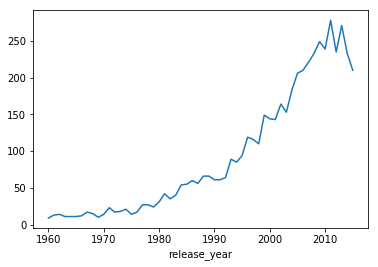

In [47]:
df_budget_year = df.groupby(['release_year'])['budget'].count()
df_budget_year.plot()

Observation: As the years passed the budget of the films increased after year 2000 there was a rise in the budget. You acn see a slight drop post 2011.

# Question 4 How does popularity change over the years, how is its trend over the years?

In [48]:
# to compute the mean for popularity by release year.
popularity_mean = df.groupby('release_year').mean()['popularity']
popularity_mean.tail()

release_year
2011    0.685607
2012    0.620326
2013    0.639309
2014    0.910027
2015    1.055081
Name: popularity, dtype: float64

In [49]:
popularity_median = df.groupby('release_year').median()['popularity']
popularity_median.tail()

release_year
2011    0.420930
2012    0.344263
2013    0.356506
2014    0.383337
2015    0.407396
Name: popularity, dtype: float64

Observation: By this we can understand the median of the popularity over the years. There was a drop in the median popularity of the films post 2011 and pre 2015.

Let us visualize it.

In [50]:
index_mean = popularity_mean.index
index_median = popularity_median.index

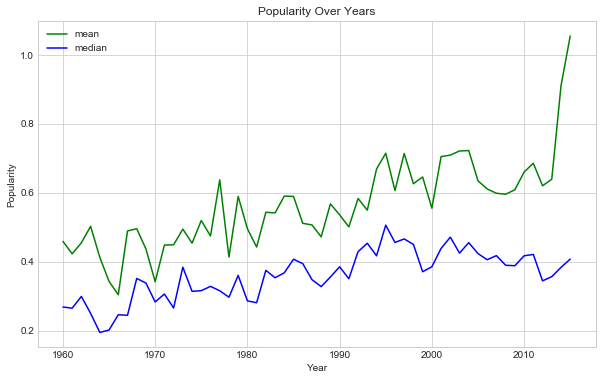

In [51]:
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, popularity_mean
x2, y2 = index_median, popularity_median
#set size
plt.figure(figsize=(10,6))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'g', label = 'mean')
plt.plot(x2, y2, color = 'b', label = 'median')
#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left')

Observation: Through the graph we can understand that the the mean popularity has been increasing year to year and it was highest, i.e. it's peak was in 2015. The average popularity of the movies have been on high trend since past few years.


# Question 5 Which are the movies that got highest and lowest vote average?

In [52]:
df.describe().vote_average

count    10703.000000
mean         5.966112
std          0.930155
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [53]:
bin_edges = [1.50, 5.40, 6.0, 6.60, 9.20]

In [54]:
bin_names = ['low', 'medium', 'medium-high', 'high']

In [55]:
df['vote_rating'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

In [56]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,medium-high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,medium-high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,high


In [67]:
bin_names = df.groupby(['vote_rating','release_year']).median()
bin_names.tail(20)

id  popularity      budget     revenue  \
vote_rating release_year                                                 
high        1996           10884.0    0.477065  14000000.0  33459416.0   
            1997            9338.5    0.801619  35000000.0  51550797.0   
            1998            9631.0    0.653163  26000000.0  44547681.0   
            1999            9518.0    0.615841  32000000.0  67123076.5   
            2000           10598.5    0.599626  30000000.0  69553122.5   
            2001            6311.0    0.703831  48000000.0  85498060.5   
            2002            9045.0    0.557277  25000000.0  82719885.0   
            2003           10615.0    0.405341  27440000.0  56328034.5   
            2004           10625.0    0.429419  25000000.0  81416157.0   
            2005            9390.0    0.435692  15000000.0  24127895.0   
            2006           11656.5    0.366273  26000000.0  42647449.0   
            2007            7917.0    0.479267  20000000.0  55112356.0   
            2008           13851.0    0.361308  15000000.0  32729427.5   
            2009           23128.0    0.430617  25000000.0  47136206.0   
            2010           44639.0    0.400305  15000000.0   9455232.0   
            2011           69891.0    0.352084  12915586.5  23057115.0   
            2012           96399.0    0.316117  21000000.0  48126384.0   
            2013          172520.0    0.374148  20000000.0  81843382.5   
            2014          250650.0    0.380595  22250000.0  52424533.0   
            2015          309299.0    0.476341  25000000.0  60440971.0   

                          runtime  vote_count  vote_average    budget_adj  \
vote_rating release_year                                                    
high        1996            108.0        48.0          6.90  2.754055e+06   
            1997            120.0       245.0          7.00  2.377306e+07   
            1998            110.0       151.0          6.90  2.006543e+06   
            1999            110.0       169.0          7.10  1.257345e+07   
            2000            109.0       175.5          7.15  7.597753e+06   
            2001            117.5       214.0          7.10  1.600935e+07   
            2002            110.0        70.0          7.00  6.061307e+06   
            2003            106.0        62.5          7.10  2.963441e+05   
            2004            107.0        82.0          7.00  2.308891e+06   
            2005            108.0        75.5          7.00  2.791408e+06   
            2006            111.5        57.5          7.00  0.000000e+00   
            2007            102.0        67.5          7.00  3.155006e+06   
            2008            101.0        53.0          7.10  0.000000e+00   
            2009             98.0        63.0          7.10  0.000000e+00   
            2010            103.0        53.0          7.10  0.000000e+00   
            2011             99.0        45.0          7.00  0.000000e+00   
            2012            103.0        61.0          7.10  0.000000e+00   
            2013            101.0        77.0          7.10  0.000000e+00   
            2014            102.0        77.5          7.20  0.000000e+00   
            2015            103.0        86.0          7.20  0.000000e+00   

                           revenue_adj  
vote_rating release_year                
high        1996          2.895903e+06  
            1997          1.667785e+07  
            1998          3.177156e+06  
            1999          1.436684e+07  
            2000          2.844665e+07  
            2001          2.377369e+07  
            2002          1.119823e+07  
            2003          8.186111e+06  
            2004          1.687786e+06  
            2005          3.267218e+06  
            2006          5.931149e+05  
            2007          8.164902e+05  
            2008          0.000000e+00  
            2009          0.000000e+00  
            2010          0.000000e+00  
           

Observation: So by this we can see the movies as per their id to know the movies with vote rating as 'High' to understand which are those movies and other factors associated to them. The movie in 2015 got highest vote average.

In [69]:
result_mean = df.groupby('vote_rating')['popularity'].mean()
result_mean

vote_rating
low            0.422286
medium         0.559951
medium-high    0.710686
high           0.956951
Name: popularity, dtype: float64

In [70]:
vote = np.arange(len(result_mean))  
# the width of the bars
width = 1.0       
vote

array([0, 1, 2, 3])

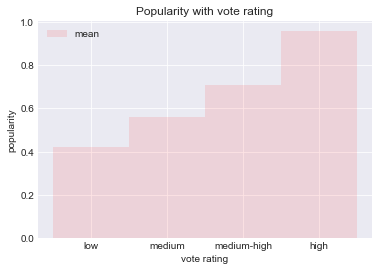

In [74]:
# plot bars
#set style
sns.set_style('darkgrid')
bars = plt.bar(vote, result_mean, width, color='r', alpha=.10, label='mean')

# title and labels
plt.ylabel('popularity')
plt.xlabel('vote rating')
plt.title('Popularity with vote rating')
locations = vote  # xtick locations，345...
labels = result_mean.index  
plt.xticks(locations, labels)
# legend
plt.legend()

Observation: We can undertand by ths bar graph that more the vote rating more is the popularity. This is so obvious more votes that a movie gets through facebook or other means of survey more popular it becomes as more people go to watch it.

In [77]:
df_high=df[df['vote_rating'] =='high']
df_high.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,high
5,281957,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08,high
7,286217,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08,high
9,150540,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/2015,3935,8.0,2015,1.609999e+08,7.854116e+08,high
12,264660,6.118847,15000000.0,3.686941e+07,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/2015,2854,7.6,2015,1.379999e+07,3.391985e+07,high
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/2015,4304,7.4,2015,2.575999e+08,1.292632e+09,high
15,273248,5.898400,44000000.0,1.557601e+08,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,12/25/2015,2389,7.4,2015,4.047998e+07,1.432992e+08,high
17,102899,5.573184,130000000.0,5.186022e+08,Ant-Man,Paul Rudd|Michael Douglas|Evangeline Lilly|Cor...,Peyton Reed,115,Science Fiction|Action|Adventure,Marvel Studios,7/14/2015,3779,7.0,2015,1.195999e+08,4.771138e+08,high


Observation: We can see the list of movies that got 'high' vote rating and and even its high popularity. Mad max and star wars are among the high vote rating band and even high popularity too. We get list of movies with high vote_rating.

 # Question 6 Which are the directors who made highest number of movies and what is the difference in their popularity ranking?

In [78]:
df.director.value_counts()

Woody Allen                      45
Clint Eastwood                   34
Steven Spielberg                 29
Martin Scorsese                  28
Ridley Scott                     23
Ron Howard                       22
Steven Soderbergh                22
Joel Schumacher                  21
Brian De Palma                   20
Barry Levinson                   19
Wes Craven                       19
Tim Burton                       18
Rob Reiner                       18
David Cronenberg                 18
John Carpenter                   18
Mike Nichols                     18
Robert Zemeckis                  17
Francis Ford Coppola             17
Peter Hyams                      17
Oliver Stone                     17
Walter Hill                      17
Sidney Lumet                     17
Spike Lee                        17
Stephen Frears                   17
Norman Jewison                   17
Renny Harlin                     17
Uwe Boll                         16
Stephen Herek               

In [80]:
df.query('director in ["Clint Eastwood"]').original_title.nunique()


34

Woody Allen and Clint Eastwood are two directors who directed highest number of films than any directors in the dataset.

In [81]:
df_CE=df[df['director'] =='Clint Eastwood']
df_CE.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
657,190859,3.863074,58800000.0,542307423.0,American Sniper,Bradley Cooper|Sienna Miller|Kyle Gallner|Cole...,Clint Eastwood,134,War|Action,Village Roadshow Pictures|Malpaso Productions|...,12/11/2014,3004,7.5,2014,54160153.79,4.995145e+08,high
803,209451,0.797723,40000000.0,67347013.0,Jersey Boys,Christopher Walken|Vincent Piazza|Freya Tingle...,Clint Eastwood,134,Music|Drama,Warner Bros.,6/5/2014,181,6.7,2014,36843642.03,6.203273e+07,high
1344,17689,0.495480,5500000.0,26414658.0,The Gauntlet,Clint Eastwood|Sondra Locke|Pat Hingle|William...,Clint Eastwood,109,Drama|Action|Crime|Thriller,Malpaso Productions|Warner Bros.,12/21/1977,45,6.7,1977,19787795.68,9.503416e+07,high
1499,22954,0.756385,60000000.0,122233971.0,Invictus,Morgan Freeman|Matt Damon|Tony Kgoroge|Patrick...,Clint Eastwood,134,Drama|History,Spyglass Entertainment|Malpaso Productions|Rev...,12/10/2009,675,6.9,2009,60984026.05,1.242387e+08,high
2086,44603,0.598275,50000000.0,105197635.0,Hereafter,Matt Damon|Bryce Dallas Howard|George McLaren|...,Clint Eastwood,129,Drama|Fantasy,Amblin Entertainment|Malpaso Productions|Warne...,10/15/2010,279,5.5,2010,50000000.00,1.051976e+08,medium


In [82]:
df_WA=df[df['director'] =='Woody Allen']
df_WA.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
155,282984,1.007054,11000000.0,27391084.0,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,95,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/2015,319,6.1,2015,10119995.55,2.519979e+07,medium-high
790,229297,0.889247,NaN,32339326.0,Magic in the Moonlight,Colin Firth|Emma Stone|Hamish Linklater|Marcia...,Woody Allen,97,Comedy|Drama|Romance,Perdido Productions|Harbor Picture Company,7/25/2014,464,6.3,2014,0.00,2.978746e+07,medium-high
1332,703,1.179653,4000000.0,38251425.0,Annie Hall,Woody Allen|Diane Keaton|Tony Roberts|Carol Ka...,Woody Allen,93,Comedy|Drama|Romance,United Artists,4/19/1977,493,7.6,1977,14391124.13,1.376203e+08,high
1489,19265,0.804857,15000000.0,NaN,Whatever Works,Larry David|Evan Rachel Wood|Adam Brooks|Micha...,Woody Allen,92,Comedy|Romance,Sony Pictures Classics|Wild Bunch|Gravier Prod...,6/19/2009,174,6.7,2009,15246006.51,0.000000e+00,high
2126,38031,0.493121,22000000.0,NaN,You Will Meet a Tall Dark Stranger,Naomi Watts|Josh Brolin|Antonio Banderas|Ewen ...,Woody Allen,98,Comedy|Drama|Romance,Antena 3 Films,5/23/2010,131,5.8,2010,22000000.00,0.000000e+00,medium


In [83]:
# More statistical information on popularity on Clint's movies.
df_CE['popularity'].describe()

count    34.000000
mean      0.830037
std       0.685645
min       0.235286
25%       0.508087
50%       0.684916
75%       0.831120
max       3.863074
Name: popularity, dtype: float64

The maximum popularity that he got was of 3.

In [44]:
# More statistical information on popularity of Woody's movies.
df_WA['popularity'].describe()

count    45.000000
mean      0.563424
std       0.276695
min       0.064317
25%       0.420500
50%       0.491393
75%       0.737519
max       1.367727
Name: popularity, dtype: float64

Observation : In terms of Maximum popularity ranking Woody Allen got was 1.36, lesser than Clint Eastwood.

Let us visualize it.

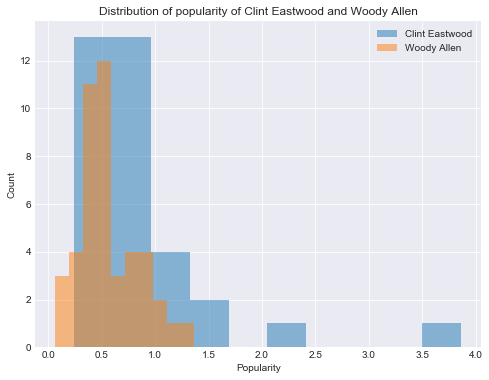

In [84]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_CE['popularity'], alpha=0.5, label='Clint Eastwood')  
ax.hist(df_WA['popularity'], alpha=0.5, label='Woody Allen')
ax.set_title('Distribution of popularity of Clint Eastwood and Woody Allen')
ax.set_xlabel('Popularity')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show()

Observation: Client Eastwood made more popular movies than Woody Allen, Though Woody Allen made more movies than Clint Eastwood.

# Question 7 More vote average means movies with more popular ranking?

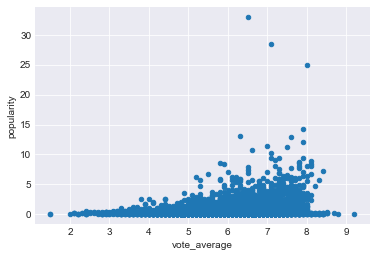

In [85]:
df.plot(x='vote_average', y='popularity', kind='scatter');

Observation: The movies between vote average 6 and 8 are very popular. The movies with 9 popularity ranking do not have high vote average.

# Question 8 What is the co-relationship between Budget and popularity?

In [86]:
formatter = lambda x: '{:,.0f}'.format(x)
df['budget_adj'] = df['budget_adj'].map(formatter)

In [87]:
formatter = lambda x: '{:,.0f}'.format(x)
df['revenue_adj'] = df['revenue_adj'].map(formatter)

In [88]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,"137,999,939","1,392,445,893",medium-high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,"137,999,939","348,161,292",high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,"101,199,956","271,619,025",medium-high
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,"183,999,919","1,902,723,130",high
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,"174,799,923","1,385,748,801",high


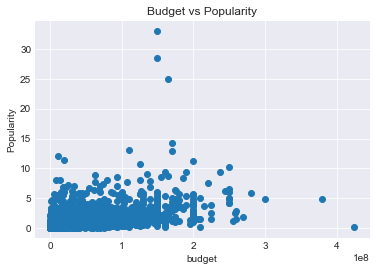

In [89]:
plt.scatter(df['budget'], df['popularity'])
#labels, titles
plt.xlabel('budget')
plt.ylabel('Popularity')
plt.title('Budget vs Popularity');

Observation: By the above scatter plot we notice that the theres no much co relation between the budget of the movies and its popularity, that is more the budget more is its popularity is not true. There are movies whose budget were more than the other maximum movies but they were not popular.

# Question 9 Which are the top 5  movies with i.highest budget ii. with highest popularity iii.vote average 

In [90]:
 df.nlargest(5, 'popularity')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,"137,999,939","1,392,445,893",medium-high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,"137,999,939","348,161,292",high
629,157336,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,11/5/2014,6498,8.0,2014,"151,980,023","572,690,645",high
630,118340,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,7/30/2014,5612,7.9,2014,"156,585,479","712,291,130",high
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,"101,199,956","271,619,025",medium-high


observation: Here we can get top 5 movies with highest popularity. But I can see that though Jurassic world is more popular than the first runner up Mad Max their vote average is different. Mad Max has more vote_average than Jurassic world and release year is the same. Popularuity of this movie must be due to its caast or story of graphic effects. From these 5 movies 2 movies falls into the category of medium-high vote_rating.

In [91]:
df.nlargest(5, 'budget')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
2244,46528,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/2010,74,6.4,2010,"425,000,000","11,087,569",medium-high
3375,1865,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/2011,3180,6.3,2011,"368,371,256","990,417,500",medium-high
7387,285,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/2007,2626,6.8,2007,"315,500,575","1,010,653,508",high
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4/22/2015,4304,7.4,2015,"257,599,887","1,292,632,337",high
6570,1452,1.957331,270000000.0,3.910812e+08,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/2006,834,5.3,2006,"292,050,673","423,020,464",low


Observation: We get to see top 5 movies with the highest budget. Movie - The Warrior's Way tops the list. Superman Returns which is 5th in the list has low vote_rating.

The Warrior's Way though tops the list of high budget movies its popularity is very less than the other movies.

In [112]:
df.nlargest(5, 'vote_average')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_rating
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,9/3/2011,14,9.2,2011,0.0,0.0,high
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,1/1/2015,11,8.9,2015,0.0,0.0,high
1200,374430,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/2014,41,8.8,2014,0.0,0.0,high
2269,51299,0.222293,0,0,Life Cycles,NaN,Derek Frankowski,47,Documentary,NaN,10/2/2010,27,8.8,2010,0.0,0.0,high
6911,24970,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,145,Music,SMV Enterprises|Columbia Music Video|EMI,7/9/2006,23,8.7,2006,0.0,0.0,high


Observation: 
Movie 'The Story of Film: An Odyssey' tops the list of vote_average. 

# Question 10 Which is the genre with highest number of movies in the dataset?

In [93]:
def breakdata(column):
    data =df[column].str.cat(sep='|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending=False)
    return count


In [94]:
count = breakdata('genres')
count.head()


Drama       4738
Comedy      3765
Thriller    2900
Action      2374
Romance     1703
dtype: int64

Observation: Drama has highest number of movies and it is followed by comedy.

# Question 11 How has been the trend of the movie release over the years?

In [108]:
movie_count = df.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

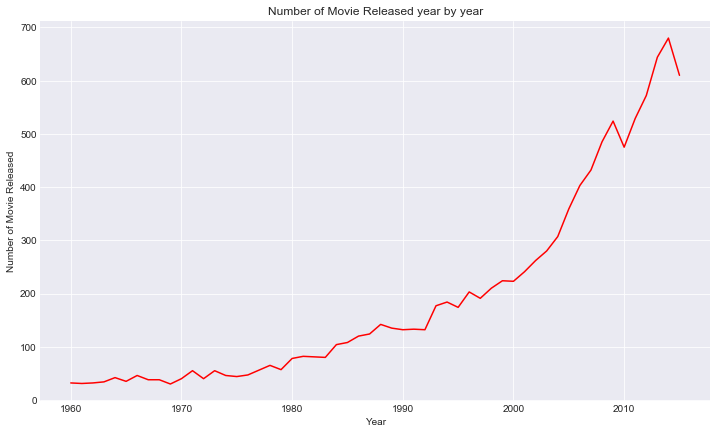

In [109]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_count.index
# y is number of movie released
y = movie_count
#set size
plt.figure(figsize=(12, 7))
#plot line chart 
plt.plot(x, y, color = 'r', label = 'mean')
#set title and labels
plt.title('Number of Movie Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

Observation: As the years passed we see there was a rise in the number of movies released each year.

# Question 12 Which is the most popular movie in this dataset?

In [140]:
popular_movie = df[['original_title', 'popularity']]

Text(0.5,1,'The popularity rating of each movie in the dataset')

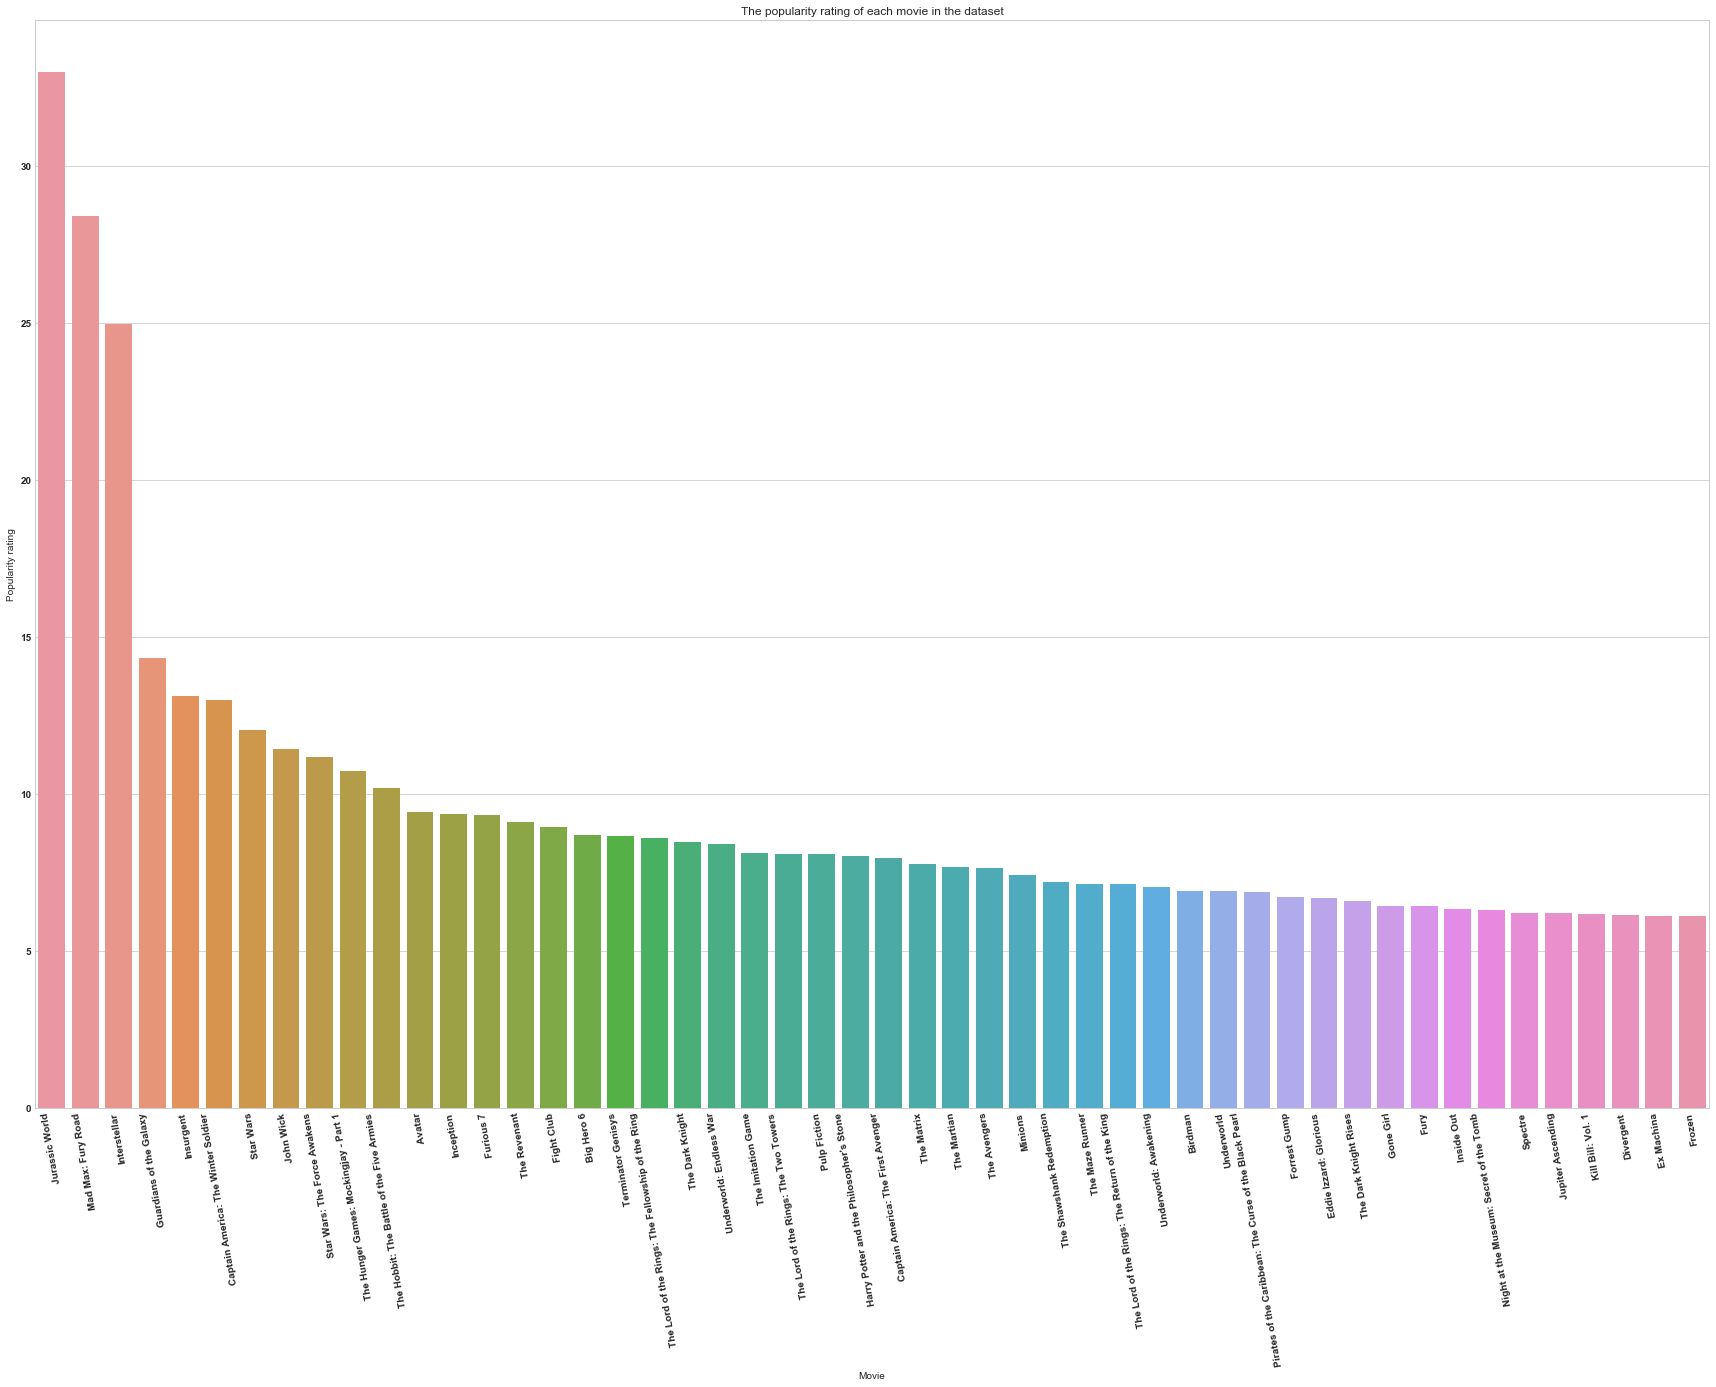

In [142]:
plt.figure(figsize=[30,20])
sns.barplot(data=movie_popu.sort_values(by='popularity', ascending=False)[0:50], x='original_title', y='popularity')
plt.xticks(rotation=100)
plt.xlabel('Movie')
plt.ylabel('Popularity rating')
plt.title('The popularity rating of each movie in the dataset')

Observation: Jurassic world , Mad Max & Interstellar' are the most popular movies in the dataset and they are way morre popular than many other movies in the dataset.

## Conclusions



Data cleaning: In the data cleaning process I found that many values were null values in various columns. Hence I droppped null values in cast, genres and director.
The major problem with the data set was of 'zero' values in the dataset  in the revenue and budget column. And more than 50% of the films had 'zero' value in their columns. Which is realyy impossible in reality as there can be no films that had zero budget and revenue too zero. To my surprise that it was in large numbers. Hence I decided to to retain these rows and replace zero values with null values, to keep the integrity of the data.
The same case exists in column 'runtime' , but the zero values in that column very few so I dropped them.

Overall the data was clean and had only one duplicate row and it was dropped. The number of movies in the datset were enough to the analysis and will help us to understand the trend of the movies over the years and its co relation with other variables in better way.

Drawback in the dataset:
It will be more informative if the actual cost of thee film was also included in the dataset because budget minus revenue is not the accurate way tto calculate the profit made by the movies.
The zero values in the revenue and budget were in excess and hence making calualtions related to these columns would not be a good idea.

Insights:

We usually think more is the budget more is the popularity as viewers are more keen to such movies which are expensive due to its expenses spent on technicl effects and locations of shoots or extra vagant expenses to give a best view experience. By the scatter plot I notice that the theres no much co relation between the budget of the movies and its popularity, that is more the budget more is its popularity is not true. There are movies whose budget were more than the other maximum movies but they were not popular.

I was more curious to know if the popularity of the films, does it increase or decrease over the year with advent of technology and other means of entertainment in our day to day like like plays, game stations and tourism or amusemment parks etc. Through scatter plot I could undersatnd the popularity of films have increased over the years and i think that can be due to innovation in film making of social media in the recent years.

The question that I explored was that if the runtime is more how is its popularity? The anser to it was very much obvious that more runtime, more is the popularity as people prefer a film more engaging with better story and entertain them for atleast 2 hours.

Another insight that we can get is the more the popularity more is the vote avrage ranking and popular movies will get better vote average by the viewers. 

We usually think that directors who make maximum movies must be most popular but this was challenged by the graph that suggested that, client Eastwood made more popular movies than Woody Allen, Though Woody Allen made more movies than Clint Eastwood.

With more other forms of entertainement and inflation, I was curious to know do film makers make more movies or has it decreased over the years, As the years passed we see there was a rise in the number of movies released each year, but a recent drop near 2013-2015.

Ofcourse, I wanted to know the most popular movie in the dataset and Jurassic world was the most popular movie till date and it is not surprisisng to know that as it was indeed block buster movie.
     
It was certainly a great experience to analyze this dataset through various statistical graphs to clear pre concieved notions and know more about the dataset.